## Import Library

In [69]:
# Data Import and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from collections import Counter

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Validation
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from xgboost import plot_importance

## Business and Data Understanding

In [2]:
data = pd.read_csv("bank-additional-full.csv", engine='python', quotechar='"', sep=";")
data

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...         1    999         0   
1      telephone   may         mon  ...         1    999         0   
2      telephone   may         mon  ...         1    999         0   
3      telephone   may         mon  ...         1    999         0   
4      telephone   may         mon  ...         1    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
41183   cellular   nov         fri  ...         1    999         0   
41184   cellular   nov         fri  ...         1    999         0   
41185   cellular   nov         fri  ...         2    999         0   
41186   cellular   nov         fri  ...         1    999         0   
41187   cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed    y  
0           5191.0   no  
1           5191.0   no  
2           5191.0   no  
3           5191.0   no  
4           5191.0   no  
...            ...  ...  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[41188 rows x 21 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
data.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

## EDA & Data Preprocessing

In [6]:
df = data.copy()

In [7]:
#Delete unneeded columns 
df.drop(columns=['contact'], axis=1, inplace=True) 

In [8]:
df.duplicated().sum()

12

In [9]:
# drop duplicates
df = df.drop_duplicates()
print(df.duplicated().sum())

0


In [10]:
# Separate data
category_col = df.select_dtypes(object)
numeric_col = df.select_dtypes(exclude ='object')

### Handling categorical data

The value of the variable containing the unknown is not very clear, so we changed it to nan and made it a random value from the existing values.

In [11]:
for col in category_col:
    category_col[col] = category_col[col].replace({'unknown':np.nan})

In [12]:
category_col

job  marital            education default housing loan month  \
0        housemaid  married             basic.4y      no      no   no   may   
1         services  married          high.school     NaN      no   no   may   
2         services  married          high.school      no     yes   no   may   
3           admin.  married             basic.6y      no      no   no   may   
4         services  married          high.school      no      no  yes   may   
...            ...      ...                  ...     ...     ...  ...   ...   
41183      retired  married  professional.course      no     yes   no   nov   
41184  blue-collar  married  professional.course      no      no   no   nov   
41185      retired  married    university.degree      no     yes   no   nov   
41186   technician  married  professional.course      no      no   no   nov   
41187      retired  married  professional.course      no     yes   no   nov   

      day_of_week     poutcome    y  
0             mon  nonexistent   no  
1             mon  nonexistent   no  
2             mon  nonexistent   no  
3             mon  nonexistent   no  
4             mon  nonexistent   no  
...           ...          ...  ...  
41183         fri  nonexistent  yes  
41184         fri  nonexistent   no  
41185         fri  nonexistent   no  
41186         fri  nonexistent  yes  
41187         fri      failure   no  

[41176 rows x 10 columns]

In [13]:
category_col['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', nan,
       'entrepreneur', 'student'], dtype=object)

In [14]:
category_col['job'] = category_col['job'].replace(np.nan)
category_col['job'] = category_col['job'].fillna(np.random.choice(pd.Series(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed','entrepreneur', 'student'])))

In [15]:
category_col['marital'].unique()

array(['married', 'single', 'divorced', nan], dtype=object)

In [16]:
category_col['marital'] = category_col['marital'].replace(np.nan)
category_col['marital'] = category_col['marital'].fillna(np.random.choice(pd.Series(['married', 'single', 'divorced'])))

In [17]:
category_col['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', nan, 'university.degree', 'illiterate'],
      dtype=object)

In [18]:
category_col['education'] = category_col['education'].replace(np.nan)
category_col['education'] = category_col['education'].fillna(np.random.choice(pd.Series(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course','university.degree', 'illiterate'])))

In [19]:
category_col['default'].unique()

array(['no', nan, 'yes'], dtype=object)

In [20]:
category_col['default'] = category_col['default'].replace(np.nan)
category_col['default'] = category_col['default'].fillna(np.random.choice(pd.Series(['no','yes'])))

In [21]:
category_col['housing'].unique()

array(['no', 'yes', nan], dtype=object)

In [22]:
category_col['housing'] = category_col['housing'].replace(np.nan)
category_col['housing'] = category_col['housing'].fillna(np.random.choice(pd.Series(['no','yes'])))

In [23]:
category_col['loan'].unique()

array(['no', 'yes', nan], dtype=object)

In [24]:
category_col['loan'] = category_col['loan'].replace(np.nan)
category_col['loan'] = category_col['loan'].fillna(np.random.choice(pd.Series(['no','yes'])))

### Descriptive analysis for categorical feature

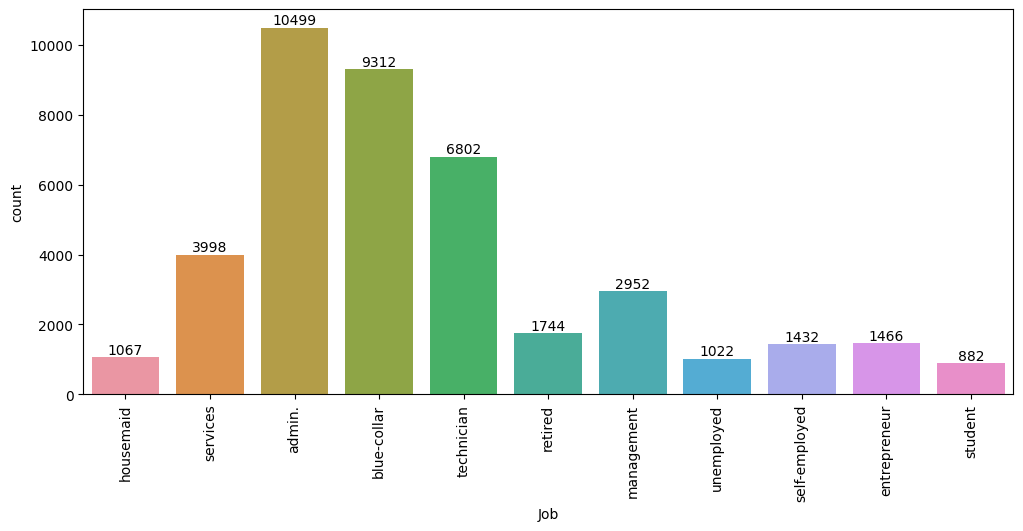

In [25]:
plt.figure(figsize = (12,5))
ax = sns.countplot(x="job", data=category_col)
ax.bar_label(ax.containers[0], label_type='edge')
plt.xlabel("Job")
plt.xticks(rotation=90)
plt.show()

<AxesSubplot: xlabel='marital', ylabel='count'>

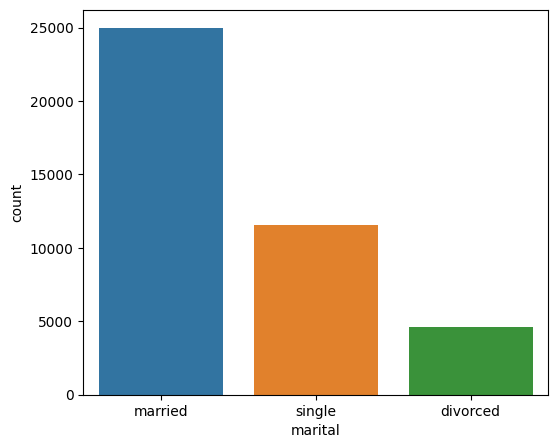

In [26]:
plt.figure(figsize=(6,5))
sns.countplot(data=category_col, x='marital')

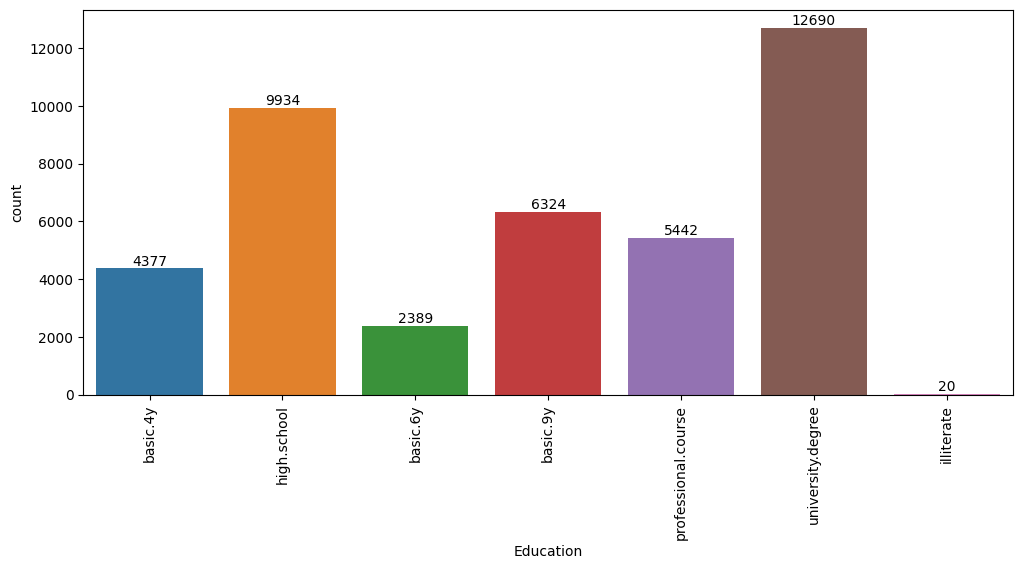

In [27]:
plt.figure(figsize=(12,5))
ax=sns.countplot(data=category_col, x='education')
ax.bar_label(ax.containers[0], label_type='edge')
plt.xlabel('Education')
plt.xticks(rotation=90)
plt.show()

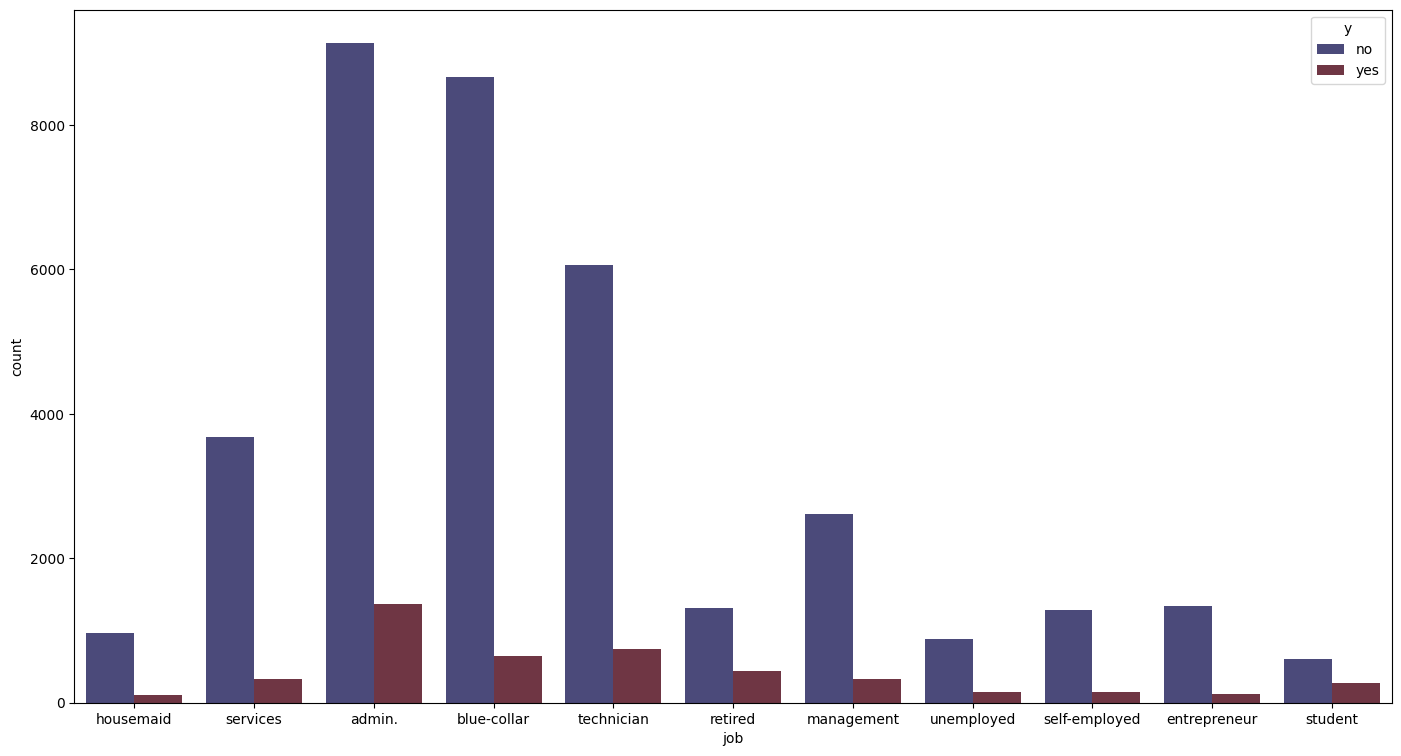

In [28]:
fig = plt.figure(figsize= (17,9))
sns.countplot(data=category_col,x="job",hue="y",palette="icefire")
plt.show()

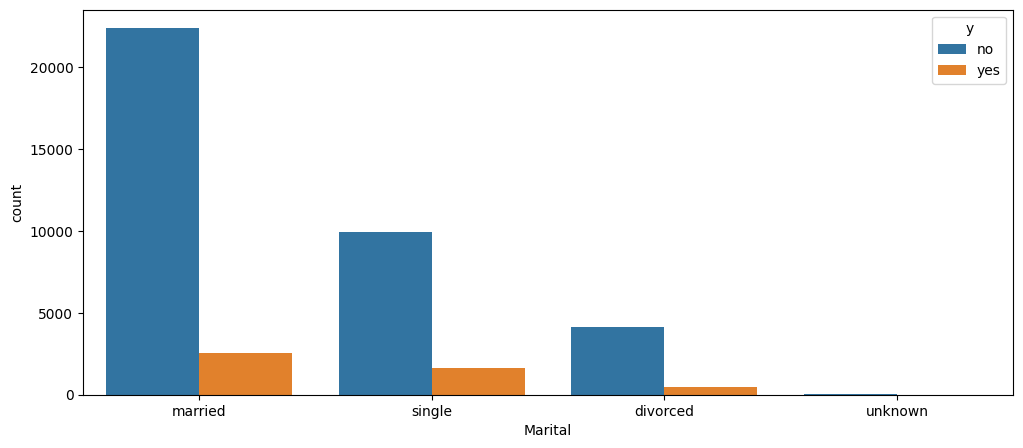

In [29]:
plt.figure(figsize = (12, 5))
sns.countplot(x="marital", data=data, hue='y')
plt.xlabel("Marital")
plt.show()

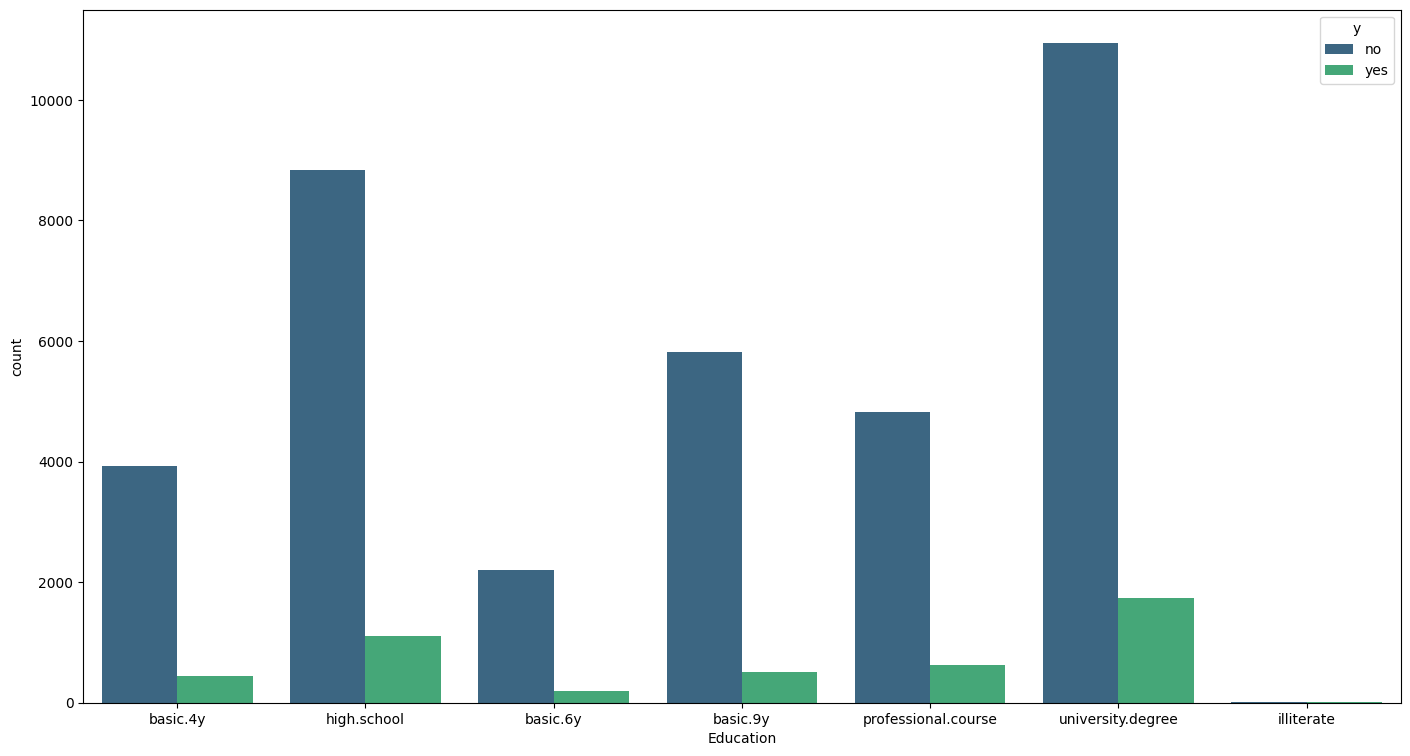

In [30]:
fig = plt.figure(figsize= (17,9))
sns.countplot(data=category_col,x="education",hue="y",palette="viridis")
plt.xlabel("Education")
plt.show()

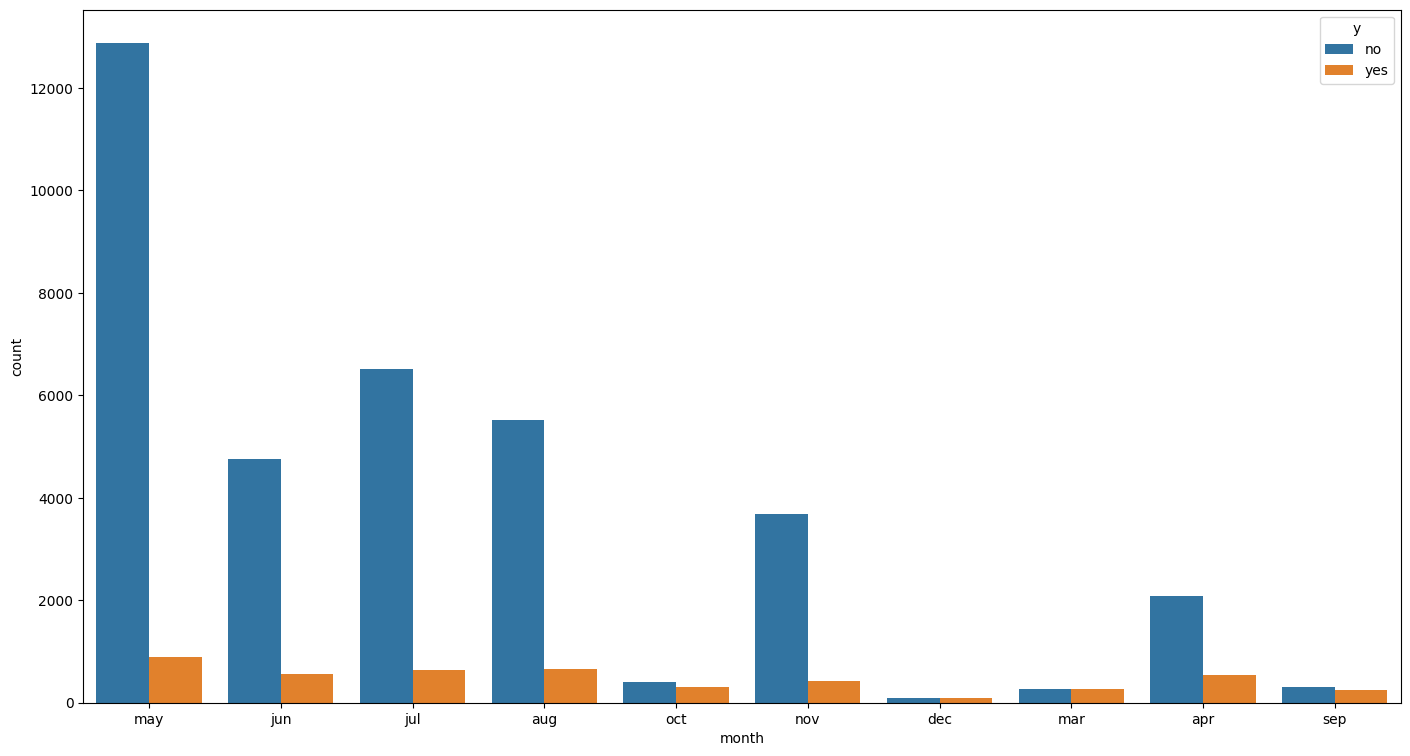

In [31]:
fig = plt.figure(figsize= (17,9))
sns.countplot(data=category_col,x="month",hue="y")
plt.xlabel("month")
plt.show()

In [32]:
poutcomes = category_col[category_col.poutcome != 'nonexistent'].poutcome.apply(lambda x: 1 if x == 'success' else 0)
coutcomes = category_col.y.apply(lambda x: 1 if x == 'yes' else 0)

print('Number of records:', len(df))
print('Success Rate (Current Campaign):', coutcomes.sum() / len(category_col))
print('Success Rate (Previous Campaign):', poutcomes.sum() / len(poutcomes))

Number of records: 41176
Success Rate (Current Campaign): 0.11266271614532737
Success Rate (Previous Campaign): 0.24408888888888888


In [33]:
count = ['default', 'housing', 'loan', 'poutcome']
for col in count:
  print(category_col[col].value_counts())

no     41173
yes        3
Name: default, dtype: int64
yes    22067
no     19109
Name: housing, dtype: int64
no     34807
yes     6369
Name: loan, dtype: int64
nonexistent    35551
failure         4252
success         1373
Name: poutcome, dtype: int64


In [34]:
# the 'y' variable looks imbalanced and should be finalized later
print('subscribed', round(category_col['y'].value_counts()['yes']/len(df) * 100,2), '% of the dataset')
print('not subscribed', round(category_col['y'].value_counts()['no']/len(df) * 100,2), '% of the dataset')

subscribed 11.27 % of the dataset
not subscribed 88.73 % of the dataset


<AxesSubplot: xlabel='y', ylabel='count'>

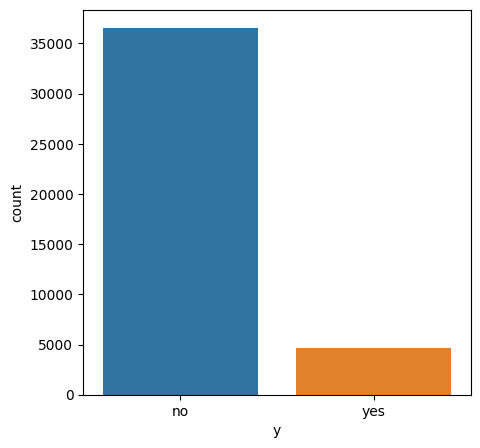

In [35]:
plt.figure(figsize=(5,5))
sns.countplot(data=category_col, x='y')

### Categorical data encoding

In [36]:
# Label encoder for categorical columns
labelencoder = LabelEncoder()
category_col['default'] = labelencoder.fit_transform(category_col['default'])
category_col['housing'] = labelencoder.fit_transform(category_col['housing'])
category_col['loan'] = labelencoder.fit_transform(category_col['loan'])
category_col['y'] = labelencoder.fit_transform(category_col['y'])
category_col['poutcome'] = labelencoder.fit_transform(category_col['poutcome'])
category_col['education'] = labelencoder.fit_transform(category_col['education'])

# One-Hot encoding for category columns
category_col = pd.get_dummies(category_col, columns = ['job','marital','month','day_of_week'])

In [37]:
category_col

education  default  housing  loan  poutcome  y  job_admin.  \
0              0        0        0     0         1  0           0   
1              3        0        0     0         1  0           0   
2              3        0        1     0         1  0           0   
3              1        0        0     0         1  0           1   
4              3        0        0     1         1  0           0   
...          ...      ...      ...   ...       ... ..         ...   
41183          5        0        1     0         1  1           0   
41184          5        0        0     0         1  0           0   
41185          6        0        1     0         1  0           0   
41186          5        0        0     0         1  1           0   
41187          5        0        1     0         0  0           0   

       job_blue-collar  job_entrepreneur  job_housemaid  ...  month_mar  \
0                    0                 0              1  ...          0   
1                    0                 0              0  ...          0   
2                    0                 0              0  ...          0   
3                    0                 0              0  ...          0   
4                    0                 0              0  ...          0   
...                ...               ...            ...  ...        ...   
41183                0                 0              0  ...          0   
41184                1                 0              0  ...          0   
41185                0                 0              0  ...          0   
41186                0                 0              0  ...          0   
41187                0                 0              0  ...          0   

       month_may  month_nov  month_oct  month_sep  day_of_week_fri  \
0              1          0          0          0                0   
1              1          0          0          0                0   
2              1          0          0          0                0   
3              1          0          0          0                0   
4              1          0          0          0                0   
...          ...        ...        ...        ...              ...   
41183          0          1          0          0                1   
41184          0          1          0          0                1   
41185          0          1          0          0                1   
41186          0          1          0          0                1   
41187          0          1          0          0                1   

       day_of_week_mon  day_of_week_thu  day_of_week_tue  day_of_week_wed  
0                    1                0                0                0  
1                    1                0                0                0  
2                    1                0                0                0  
3                    1                0                0                0  
4                    1                0                0                0  
...                ...              ...              ...              ...  
41183                0                0                0                0  
41184                0                0                0                0  
41185                0                0                0                0  
41186                0                0                0                0  
41187                0                0                0                0  

[41176 rows x 35 columns]

## Descriptive analysis for numerical data

In [38]:
numeric_col

age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0       56       261         1    999         0           1.1          93.994   
1       57       149         1    999         0           1.1          93.994   
2       37       226         1    999         0           1.1          93.994   
3       40       151         1    999         0           1.1          93.994   
4       56       307         1    999         0           1.1          93.994   
...    ...       ...       ...    ...       ...           ...             ...   
41183   73       334         1    999         0          -1.1          94.767   
41184   46       383         1    999         0          -1.1          94.767   
41185   56       189         2    999         0          -1.1          94.767   
41186   44       442         1    999         0          -1.1          94.767   
41187   74       239         3    999         1          -1.1          94.767   

       cons.conf.idx  euribor3m  nr.employed  
0              -36.4      4.857       5191.0  
1              -36.4      4.857       5191.0  
2              -36.4      4.857       5191.0  
3              -36.4      4.857       5191.0  
4              -36.4      4.857       5191.0  
...              ...        ...          ...  
41183          -50.8      1.028       4963.6  
41184          -50.8      1.028       4963.6  
41185          -50.8      1.028       4963.6  
41186          -50.8      1.028       4963.6  
41187          -50.8      1.028       4963.6  

[41176 rows x 10 columns]

In [39]:
numeric_col.describe()

age      duration      campaign         pdays      previous  \
count  41176.00000  41176.000000  41176.000000  41176.000000  41176.000000   
mean      40.02380    258.315815      2.567879    962.464810      0.173013   
std       10.42068    259.305321      2.770318    186.937102      0.494964   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41176.000000    41176.000000   41176.000000  41176.000000  41176.000000  
mean       0.081922       93.575720     -40.502863      3.621293   5167.034870  
std        1.570883        0.578839       4.627860      1.734437     72.251364  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

In [40]:
age = df.loc[:, ['age', 'y']]
age.groupby('y').size() / len(age)

y
no     0.887337
yes    0.112663
dtype: float64

In [41]:
plt.figure(figsize=(10,5))
sns.histplot(x=numeric_col['age'],color='Blue',label='Age')
plt.axvline(x=numeric_col['age'].mean(),color='red',linestyle ="--",label='Mean Age: {}'.format(round(numeric_col['age'].mean(),2)))
plt.legend()
plt.title('Distribution of Age')
plt.show()

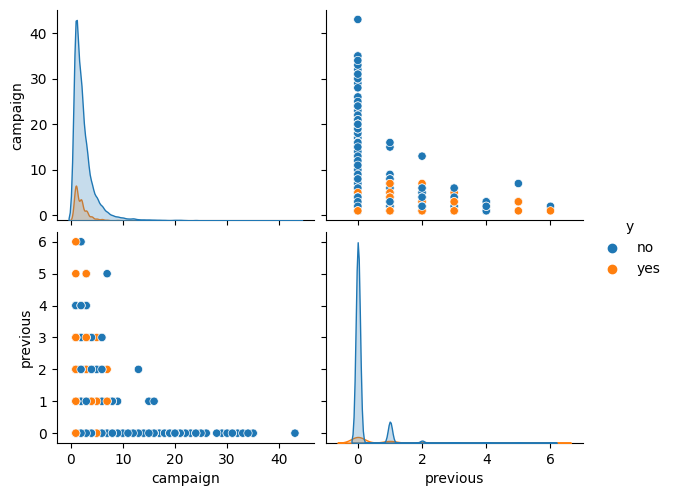

In [42]:
campaign = ['campaign', 'previous', 'y']
numeric_outcome = pd.concat([numeric_col, df['y']], axis=1)
sns.pairplot(numeric_outcome[campaign].sample(n=10000), hue='y', aspect=1.2);

In the visualisation above, it can be seen that the campaigns conducted previously and currently have shown unsatisfactory results in terms of converting to subscriptions.

In [43]:
numeric_col['pdays'].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20], dtype=int64)

In [44]:
pdays = df.loc[df.pdays != 999, ['pdays', 'y']]
pdays_999 = df.query('pdays == 999')
pdays_999.groupby('y').size() / len(pdays_999)

y
no     0.907415
yes    0.092585
dtype: float64

In [45]:
pdays.groupby('y').size() / len(pdays)

y
no     0.361716
yes    0.638284
dtype: float64

The response rate is significantly higher with customers who have been contacted before, whereas customers with code 999 (never contacted before) have a lower response rate to be converted to subscription deposits.

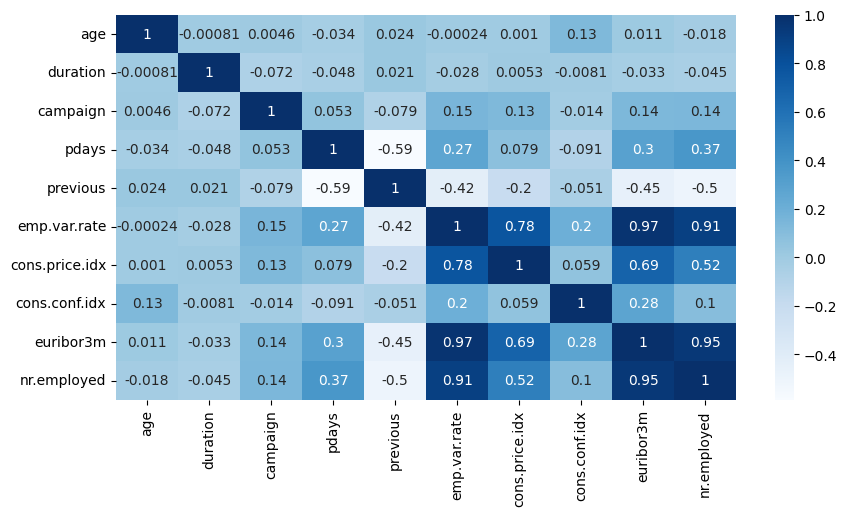

In [46]:
corr = numeric_col.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr,cmap='Blues', annot=True)
plt.show()

The above image shows that social and economic attributes are more dominant with a strong correlation.

In [47]:
soc_eco = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
soc_ec = pd.concat([df[soc_eco], df['y']], axis=1)

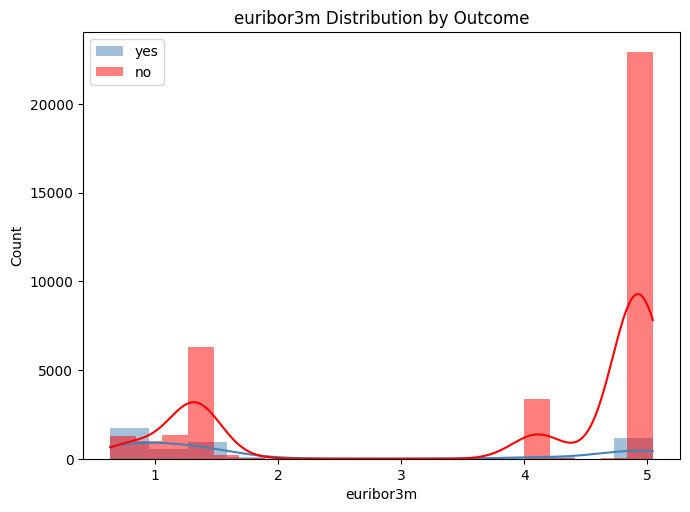

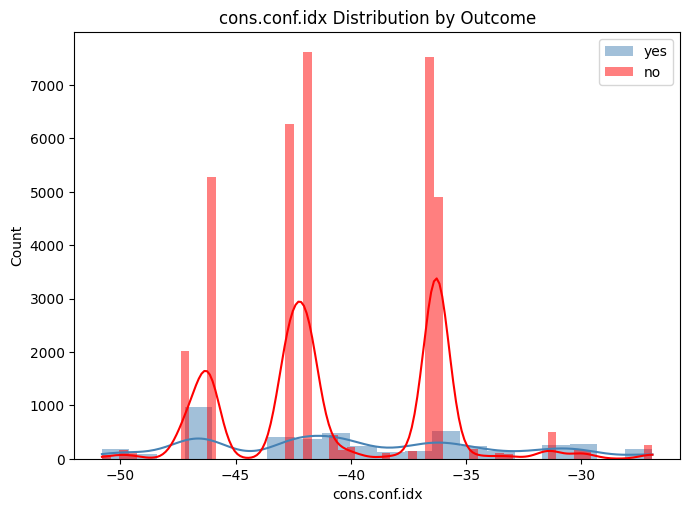

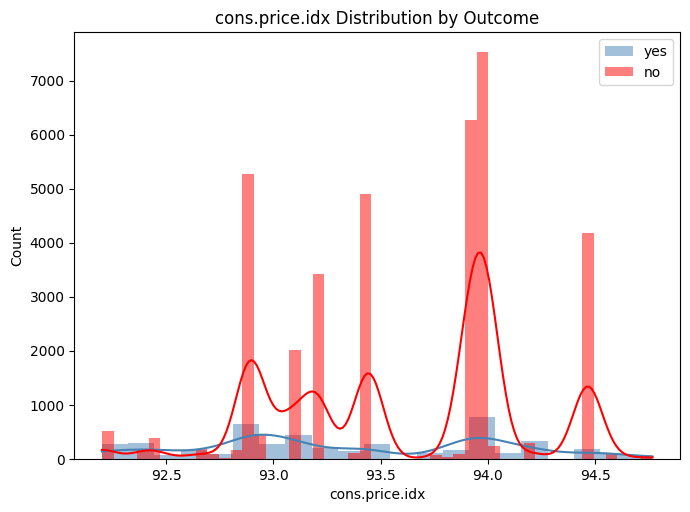

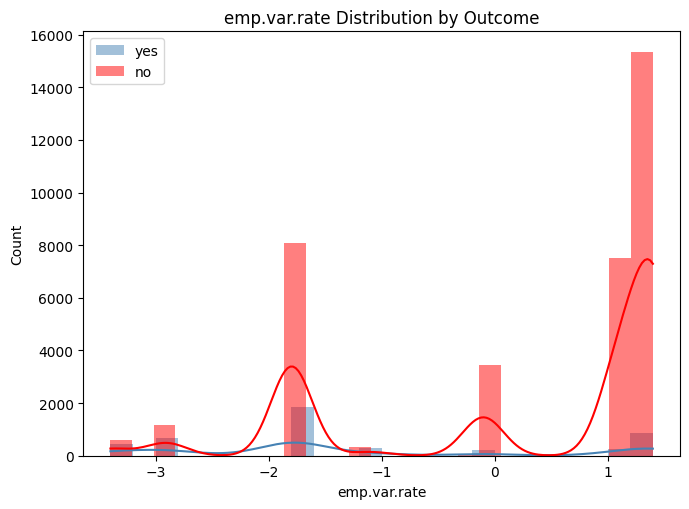

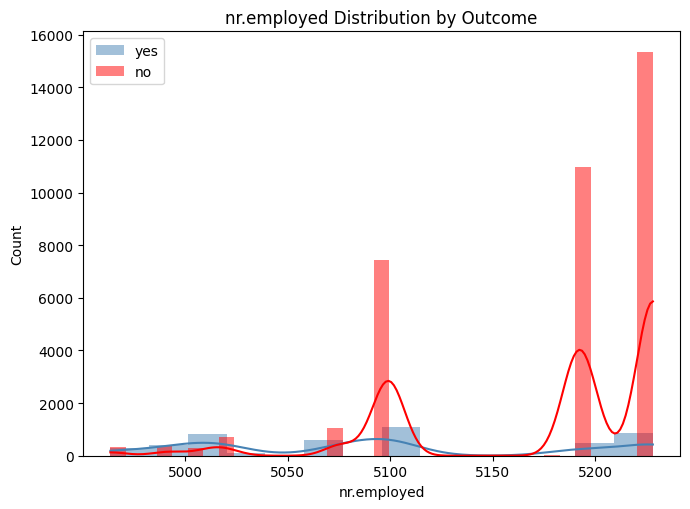

In [48]:
for c in set(soc_ec.columns) - set('y'):
  plt.figure(figsize=(7,5))
  sns.histplot(soc_ec.loc[soc_ec.y == 'yes', c],color='steelblue', label='yes',kde=True, linewidth=0);
  sns.histplot(soc_ec.loc[soc_ec.y == 'no', c],color='red', label='no',kde=True, linewidth=0);
  plt.legend();
  plt.tight_layout()  
  plt.title('%s Distribution by Outcome' % c);

Customers with subscription deposits may experience changes in social and economic conditions, such as a low job variation rate, a low 3-month Euribor rate, a low or high consumer confidence index, a high consumer price index, and few employees. These changes may depend on the level of campaigns conducted and the response received.

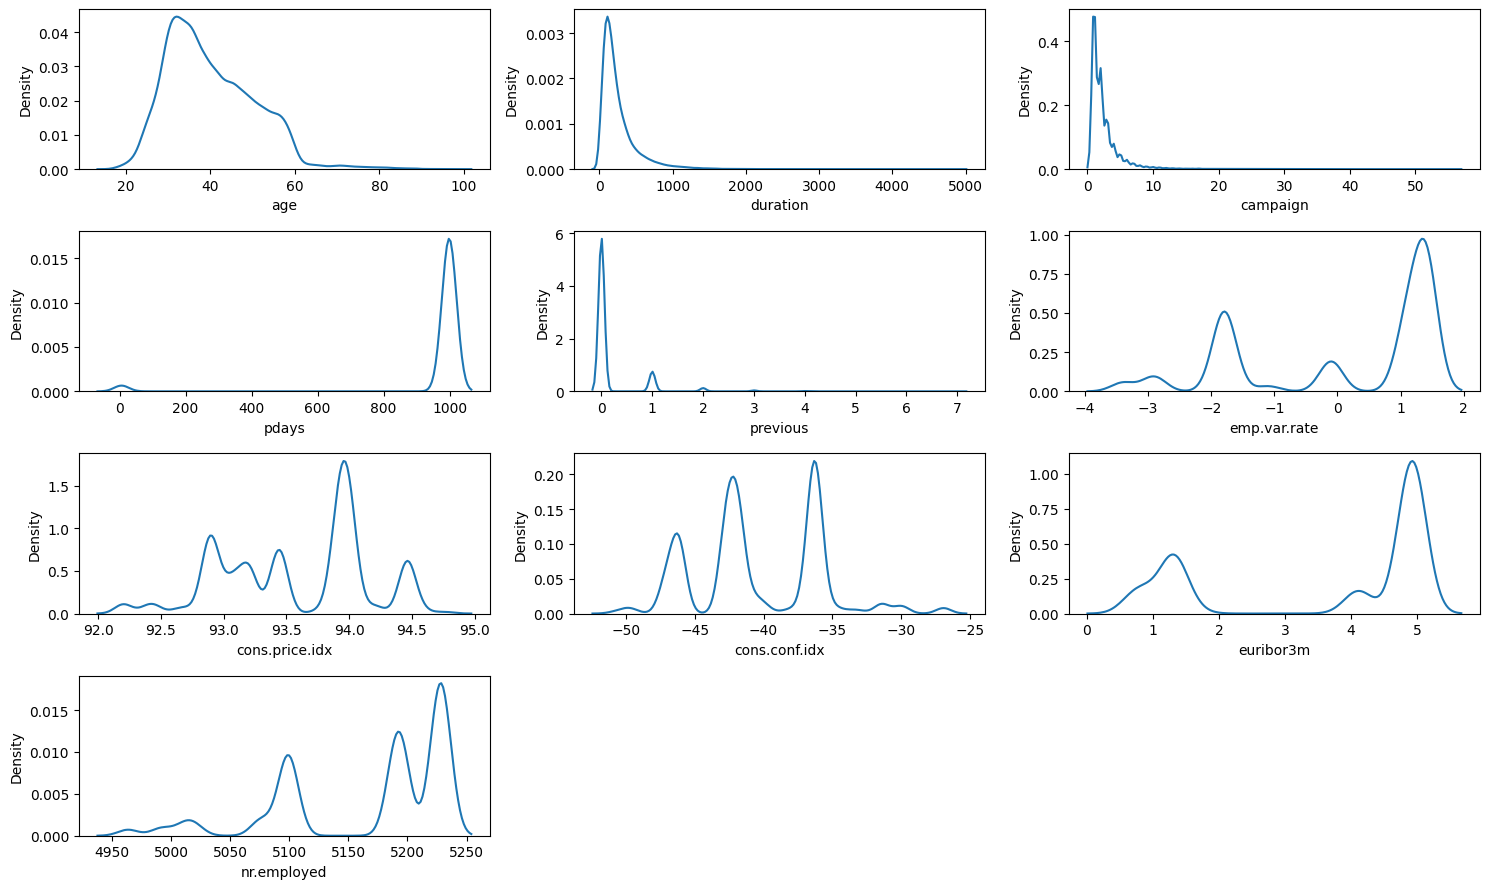

In [49]:
fig = plt.figure(figsize= (15,9))
for i, col in enumerate(numeric_col):
    
    ax=fig.add_subplot(4,3,i+1)
    
    sns.kdeplot(x=df[col], ax=ax)
    
fig.tight_layout()  
plt.show()

From the visualisation above, it shows that there are several variables that are skewed. This might be influenced by outliers that can disrupt the model. Therefore, we will fix this problem later and analyse it further.

### Handling numerical data

In [50]:
plt.figure(figsize=(12,12))
for i,v in enumerate(numeric_col):
    plt.subplot(4,3,i+1)
    sns.boxplot(x=v, data=numeric_col,
                color='grey',
                notch=True,
                fliersize=10,
                flierprops={"marker": "o"})
plt.show()

In [51]:
def detect_outliers(numeric_col, n, features_list):
    outlier_indices = [] 
    for feature in features_list: 
        Q1 = np.percentile(numeric_col[feature], 25)
        Q3 = np.percentile(numeric_col[feature], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = numeric_col[(numeric_col[feature] < Q1 - outlier_step) | (numeric_col[feature] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

numerical_columns = list(numeric_col)
print('Numerical columns: {}'.format(numerical_columns))
outliers_to_drop = detect_outliers(numeric_col, 2, numeric_col)
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

Numerical columns: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
We will drop these 339 indices:  [29498, 30227, 35856, 35973, 37193, 37237, 37355, 37493, 37597, 37675, 37716, 37756, 37769, 37819, 37861, 37954, 38022, 38033, 38071, 38074, 38081, 38088, 38169, 38175, 38179, 38191, 38247, 38252, 38260, 38314, 38316, 38415, 38430, 38452, 38471, 38486, 38487, 38505, 38580, 38587, 38676, 38703, 38722, 38726, 38783, 38810, 38825, 38831, 38846, 38892, 38901, 38967, 38984, 39041, 39058, 39061, 39124, 39184, 39186, 39261, 39331, 39348, 39444, 39471, 39473, 39475, 39476, 39478, 39498, 39504, 39520, 39614, 39639, 39650, 39655, 39662, 39676, 39682, 39719, 39740, 39896, 39974, 39975, 40050, 40078, 40080, 40117, 40119, 40163, 40201, 40262, 40273, 40291, 40300, 40356, 40400, 40421, 40450, 40458, 40468, 40469, 40470, 40484, 40529, 40575, 40611, 40638, 40686, 40702, 40714, 40716, 40718, 40879, 40886, 40950, 40951, 409

In [52]:
# Drop outliers
print("Before: {} rows".format(len(numeric_col)))
clean_outlier = numeric_col.drop(outliers_to_drop, axis = 0)
print("After: {} rows".format(len(clean_outlier)))

Before: 41176 rows
After: 40837 rows


In [53]:
# feature scaling
scaler = StandardScaler()
scaler.fit(numeric_col)
data_scaled = scaler.transform(numeric_col)
columns_value_new = numeric_col.columns
data_scaled_ok = pd.DataFrame(data_scaled, columns = columns_value_new)
data_scaled_ok.head(10)

age  duration  campaign     pdays  previous  emp.var.rate  \
0  1.533143  0.010352 -0.565963  0.195443 -0.349551      0.648101   
1  1.629107 -0.421577 -0.565963  0.195443 -0.349551      0.648101   
2 -0.290177 -0.124626 -0.565963  0.195443 -0.349551      0.648101   
3 -0.002284 -0.413864 -0.565963  0.195443 -0.349551      0.648101   
4  1.533143  0.187751 -0.565963  0.195443 -0.349551      0.648101   
5  0.477537 -0.232608 -0.565963  0.195443 -0.349551      0.648101   
6  1.821036 -0.460142 -0.565963  0.195443 -0.349551      0.648101   
7  0.093680 -0.159335 -0.565963  0.195443 -0.349551      0.648101   
8 -1.537711  0.469276 -0.565963  0.195443 -0.349551      0.648101   
9 -1.441747 -0.803371 -0.565963  0.195443 -0.349551      0.648101   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
0        0.722628       0.886568   0.712463     0.331695  
1        0.722628       0.886568   0.712463     0.331695  
2        0.722628       0.886568   0.712463     0.331695  
3        0.722628       0.886568   0.712463     0.331695  
4        0.722628       0.886568   0.712463     0.331695  
5        0.722628       0.886568   0.712463     0.331695  
6        0.722628       0.886568   0.712463     0.331695  
7        0.722628       0.886568   0.712463     0.331695  
8        0.722628       0.886568   0.712463     0.331695  
9        0.722628       0.886568   0.712463     0.331695

In [54]:
dataset = pd.concat([data_scaled_ok, category_col], axis=1, join='inner')
display(dataset)

age  duration  campaign     pdays  previous  emp.var.rate  \
0      1.533143  0.010352 -0.565963  0.195443 -0.349551      0.648101   
1      1.629107 -0.421577 -0.565963  0.195443 -0.349551      0.648101   
2     -0.290177 -0.124626 -0.565963  0.195443 -0.349551      0.648101   
3     -0.002284 -0.413864 -0.565963  0.195443 -0.349551      0.648101   
4      1.533143  0.187751 -0.565963  0.195443 -0.349551      0.648101   
...         ...       ...       ...       ...       ...           ...   
41171  3.164534  0.291876 -0.565963  0.195443 -0.349551     -0.752402   
41172  0.573501  0.480845 -0.565963  0.195443 -0.349551     -0.752402   
41173  1.533143 -0.267317 -0.204990  0.195443 -0.349551     -0.752402   
41174  0.381573  0.708379 -0.565963  0.195443 -0.349551     -0.752402   
41175  3.260499 -0.074492  0.155984  0.195443  1.670821     -0.752402   

       cons.price.idx  cons.conf.idx  euribor3m  nr.employed  ...  month_mar  \
0            0.722628       0.886568   0.712463     0.331695  ...          0   
1            0.722628       0.886568   0.712463     0.331695  ...          0   
2            0.722628       0.886568   0.712463     0.331695  ...          0   
3            0.722628       0.886568   0.712463     0.331695  ...          0   
4            0.722628       0.886568   0.712463     0.331695  ...          0   
...               ...            ...        ...          ...  ...        ...   
41171        2.058076      -2.225059  -1.495197    -2.815689  ...          0   
41172        2.058076      -2.225059  -1.495197    -2.815689  ...          0   
41173        2.058076      -2.225059  -1.495197    -2.815689  ...          0   
41174        2.058076      -2.225059  -1.495197    -2.815689  ...          0   
41175        2.058076      -2.225059  -1.495197    -2.815689  ...          0   

       month_may  month_nov  month_oct  month_sep  day_of_week_fri  \
0              1          0          0          0                0   
1              1          0          0          0                0   
2              1          0          0          0                0   
3              1          0          0          0                0   
4              1          0          0          0                0   
...          ...        ...        ...        ...              ...   
41171          0          1          0          0                0   
41172          0          1          0          0                0   
41173          0          1          0          0                0   
41174          0          1          0          0                0   
41175          0          1          0          0                0   

       day_of_week_mon  day_of_week_thu  day_of_week_tue  day_of_week_wed  
0                    1                0                0                0  
1                    1                0                0                0  
2                    1                0                0                0  
3                    1                0                0                0  
4                    1                0                0                0  
...                ...              ...              ...              ...  
41171                0                1                0                0  
41172                0                1                0                0  
41173                0                1                0                0  
41174                0                1                0                0  
41175                0                1                0                0  

[41164 rows x 45 columns]

In [55]:
dataset = dataset.reset_index(drop=True)

## Split data into separate training and test set

In [56]:
# Split the training and testing data, choose the target, and drop any unimportant variables.
X = dataset.drop(columns=['y'])
Y = dataset.filter(['y'], axis =1)
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state=10)

In [57]:
# creating an instance
sm = SMOTE(random_state=27)
# applying it to the training set
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

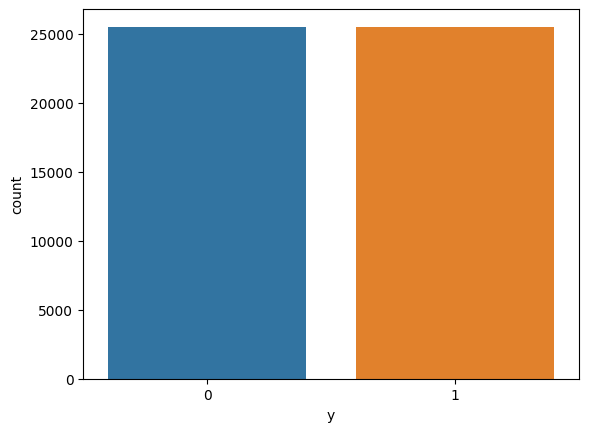

In [58]:
# Recheck inbalance
sns.countplot(x ='y', data = y_train_smote)
plt.show()

## Modeling

In [59]:
def model_assess(model, name='Default'):
    model.fit(X_train_smote, y_train_smote.values.ravel())
    preds = model.predict(X_test)
    preds_proba = model.predict_proba(X_test)
    print('                   ', name, '\n',
    classification_report(y_test, model.predict(X_test)))
#DecisionTreeRegressor
dt = DecisionTreeClassifier()
model_assess(dt, name='DecisionTreeClassifier')
#Logistic Regression
lg = LogisticRegression(max_iter=3000)
model_assess(lg, 'Logistic Regression')
#Support Vector Machine
svm = SVC(probability=True)
model_assess(svm, 'Support Vector Machine')
#Naive Bayes
nb = BernoulliNB()
model_assess(nb, 'Naive Bayes')
#XGB
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
model_assess(xgb, 'XGBoost')
#Random Forest
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
model_assess(rf, 'Random Forest')

                    DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.92      0.88      0.90     11026
           1       0.26      0.34      0.29      1324

    accuracy                           0.82     12350
   macro avg       0.59      0.61      0.60     12350
weighted avg       0.85      0.82      0.83     12350

                    Logistic Regression 
               precision    recall  f1-score   support

           0       0.92      0.95      0.94     11026
           1       0.45      0.35      0.39      1324

    accuracy                           0.89     12350
   macro avg       0.69      0.65      0.66     12350
weighted avg       0.87      0.89      0.88     12350

                    Support Vector Machine 
               precision    recall  f1-score   support

           0       0.93      0.94      0.94     11026
           1       0.45      0.40      0.42      1324

    accuracy                           0.88     12

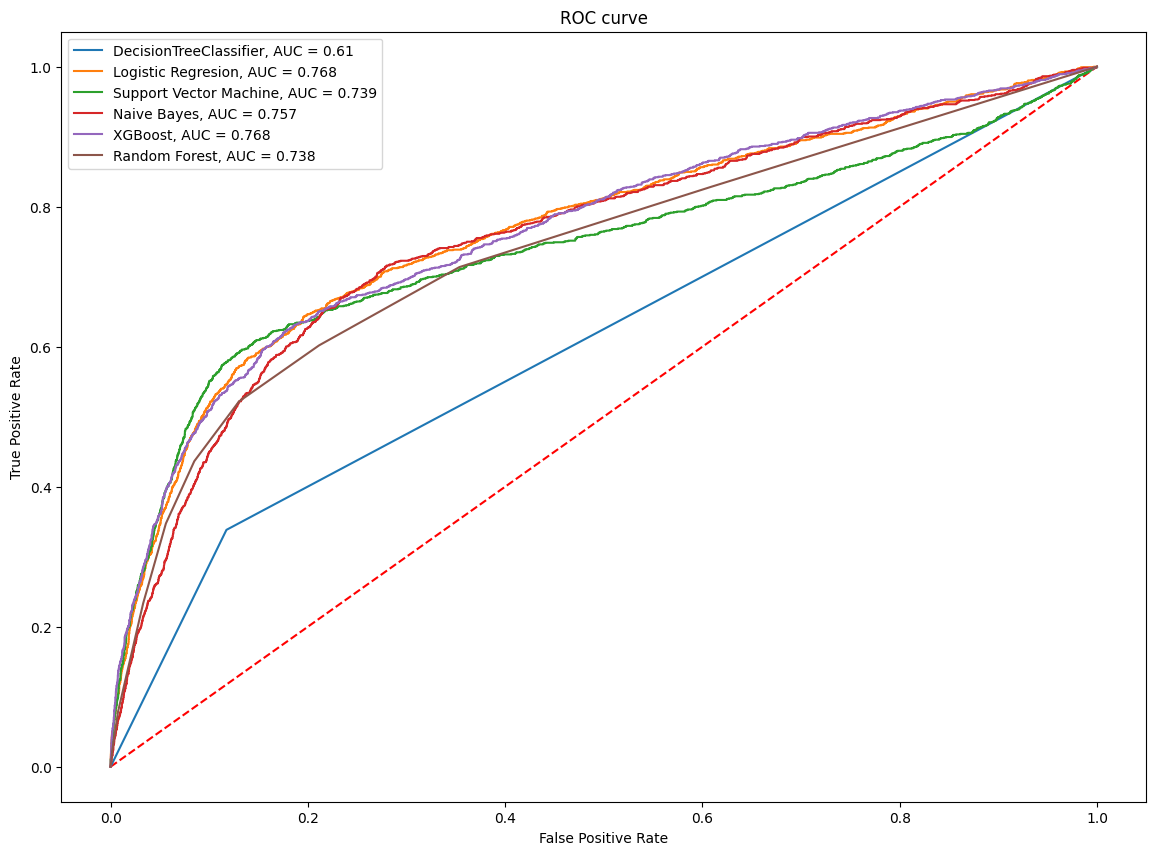

In [60]:
#ROC AUC 
fig = plt.figure(figsize=(14,10)) 
plt.plot([0, 1], [0, 1],'r--')
#DecisionTreeClassifier 
preds_proba_dt = dt.predict_proba(X_test) 
probsdt = preds_proba_dt[:, 1] 
fpr, tpr, thresh = roc_curve(y_test, probsdt) 
aucdt = roc_auc_score(y_test, probsdt) 
plt.plot(fpr, tpr, label= f'DecisionTreeClassifier, AUC = {str(round(aucdt,3))}')
#Logistic Regression 
preds_proba_lg = lg.predict_proba(X_test) 
probslg = preds_proba_lg[:, 1] 
fpr, tpr, thresh = roc_curve(y_test, probslg) 
auclg = roc_auc_score(y_test, probslg) 
plt.plot(fpr, tpr, label =f'Logistic Regresion, AUC = {str(round(auclg,3))}')
#Support Vector Machine 
preds_proba_svm = svm.predict_proba(X_test) 
probssvm = preds_proba_svm[:, 1] 
fpr, tpr, thresh = roc_curve(y_test, probssvm) 
aucsvm = roc_auc_score(y_test, probssvm) 
plt.plot(fpr, tpr, label= f'Support Vector Machine, AUC = {str(round(aucsvm,3))}')
#Naive Bayes
preds_proba_nb = nb.predict_proba(X_test) 
probsnb = preds_proba_nb[:, 1] 
fpr, tpr, thresh = roc_curve(y_test, probsnb) 
aucnb = roc_auc_score(y_test, probsnb) 
plt.plot(fpr, tpr, label= f'Naive Bayes, AUC = {str(round(aucnb,3))}')
#XGBoost
preds_proba_xgb = xgb.predict_proba(X_test)
probsxgb = preds_proba_xgb[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probsxgb)
aucxgb = roc_auc_score(y_test, probsxgb)
plt.plot(fpr, tpr, label=f'XGBoost, AUC = {str(round(aucxgb,3))}')
#Random Forest
preds_proba_rf = rf.predict_proba(X_test)
probsrf = preds_proba_rf[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probsrf)
aucrf = roc_auc_score(y_test, probsrf)
plt.plot(fpr, tpr, label=f'Random Forest, AUC = {str(round(aucrf,3))}')
plt.ylabel("True Positive Rate") 
plt.xlabel("False Positive Rate") 
plt.title("ROC curve") 
plt.rcParams['axes.titlesize'] = 18 
plt.legend() 
plt.show( )

In [64]:
#Displaying the training model results with a heatmap visualization of the confusion matrix
model = LogisticRegression(max_iter=3000)
model.fit(X_train_smote, y_train_smote.values.ravel())
test = model.predict(X_test)
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, test)), ('0', '1'), ('0', '1'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regresion)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()